In [1]:
import tensorflow as tf
assert tf.__version__
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_dir = 'D:\Downloads\Images'

In [3]:
#check if there are any wrong images
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(image_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [3]:
original_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

In [4]:
batch_size = 64
height = 224
width = 224
train_dt = original_generator.flow_from_directory(
    image_dir,
    shuffle = True,
    target_size=(height, width),
    batch_size=batch_size,
    subset="training")
val_dt = original_generator.flow_from_directory(
    image_dir,
    shuffle = True,
    subset="validation",
    target_size=(height, width),
    batch_size=batch_size)

Found 16507 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [5]:
original_model = tf.keras.applications.MobileNetV2(input_shape=(width,height,3),
                                              include_top=False, 
                                              weights='imagenet')

In [6]:
original_model.trainable = False

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [13]:
num = 120 
model_s = Sequential([
    original_model,
    layers.Conv2D(32,(5,5),padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(5,5),padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), 
    layers.Flatten(), 
    layers.Dense(num, activation='softmax')
])

In [14]:
model_s.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model_s.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_28 (Conv2D)          (None, 5, 5, 32)          368672    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)             

In [15]:
epochs=10
base = model_s.fit(
  train_dt,
  validation_data=val_dt,
  epochs=epochs
)

Epoch 1/10
258/258 [==============================] - 314s 1s/step - loss: 2.5964 - accuracy: 0.3670 - val_loss: 1.5414 - val_accuracy: 0.5916
Epoch 2/10
258/258 [==============================] - 320s 1s/step - loss: 1.3482 - accuracy: 0.6249 - val_loss: 1.3764 - val_accuracy: 0.6238
Epoch 3/10
258/258 [==============================] - 318s 1s/step - loss: 0.9782 - accuracy: 0.7117 - val_loss: 1.3509 - val_accuracy: 0.6378
Epoch 4/10
258/258 [==============================] - 324s 1s/step - loss: 0.7211 - accuracy: 0.7793 - val_loss: 1.3360 - val_accuracy: 0.6582
Epoch 5/10
258/258 [==============================] - 327s 1s/step - loss: 0.5654 - accuracy: 0.8263 - val_loss: 1.4292 - val_accuracy: 0.6496
Epoch 6/10
258/258 [==============================] - 326s 1s/step - loss: 0.4328 - accuracy: 0.8622 - val_loss: 1.4675 - val_accuracy: 0.6653
Epoch 7/10
258/258 [==============================] - 324s 1s/step - loss: 0.3605 - accuracy: 0.8816 - val_loss: 1.5899 - val_accuracy: 0.6589

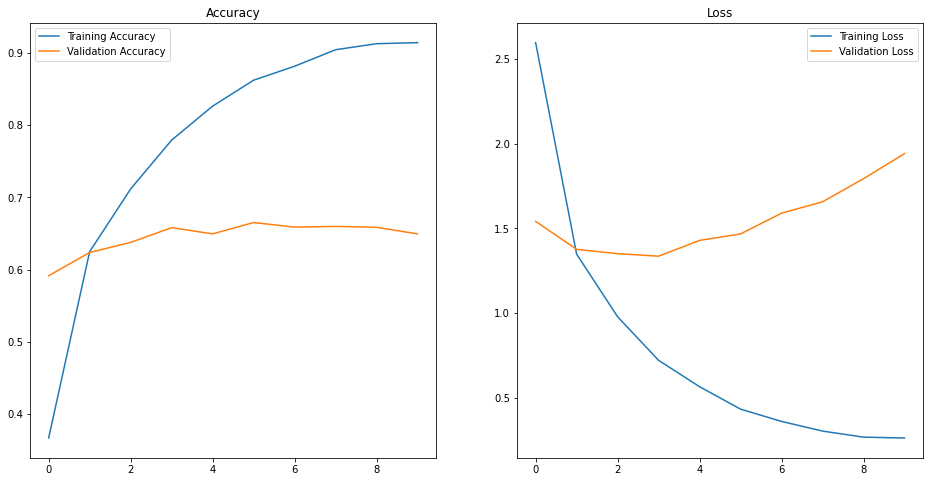

In [16]:
train_acc = base.history['accuracy']
val_acc = base.history['val_accuracy']

train_loss = base.history['loss']
val_loss = base.history['val_loss']

range_epochs = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, train_acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, train_loss, label='Training Loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [71]:
#initial ImageDataGenerator
#avioid overfitting ==>oversampling
generator_oversample = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

In [72]:
train_dataset = generator_oversample.flow_from_directory(
    image_dir,
    shuffle = True,
    target_size=(height, width),
    batch_size=batch_size,
    subset="training")
val_dataset = generator_oversample.flow_from_directory(
    image_dir,
    shuffle = True,
    subset="validation",
    target_size=(height, width),
    batch_size=batch_size)

Found 16507 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [73]:
MobileNetV2_model = tf.keras.applications.MobileNetV2(input_shape=(width,height,3),
                                              include_top=False, 
                                              weights='imagenet')

In [74]:
MobileNetV2_model.trainable = False 

In [75]:
#The number of classes
num = 120 
model = Sequential([
    MobileNetV2_model,
    layers.Conv2D(32,(5,5),padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(5,5),padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), 
    layers.Flatten(), 
    layers.Dense(num, activation='softmax')
])

In [76]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 32)          1024032   
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                      

In [78]:
epochs=10
base_model = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10
258/258 [==============================] - 382s 1s/step - loss: 3.1146 - accuracy: 0.2719 - val_loss: 1.8115 - val_accuracy: 0.5108
Epoch 2/10
258/258 [==============================] - 393s 2s/step - loss: 1.7692 - accuracy: 0.5186 - val_loss: 1.5087 - val_accuracy: 0.5747
Epoch 3/10
258/258 [==============================] - 403s 2s/step - loss: 1.4424 - accuracy: 0.6002 - val_loss: 1.4009 - val_accuracy: 0.6211
Epoch 4/10
258/258 [==============================] - 397s 2s/step - loss: 1.2985 - accuracy: 0.6308 - val_loss: 1.3507 - val_accuracy: 0.6321
Epoch 5/10
258/258 [==============================] - 399s 2s/step - loss: 1.2083 - accuracy: 0.6555 - val_loss: 1.3634 - val_accuracy: 0.6233
Epoch 6/10
258/258 [==============================] - 396s 2s/step - loss: 1.1290 - accuracy: 0.6748 - val_loss: 1.3632 - val_accuracy: 0.6289
Epoch 7/10
258/258 [==============================] - 398s 2s/step - loss: 1.0557 - accuracy: 0.6915 - val_loss: 1.3659 - val_accuracy: 0.6314

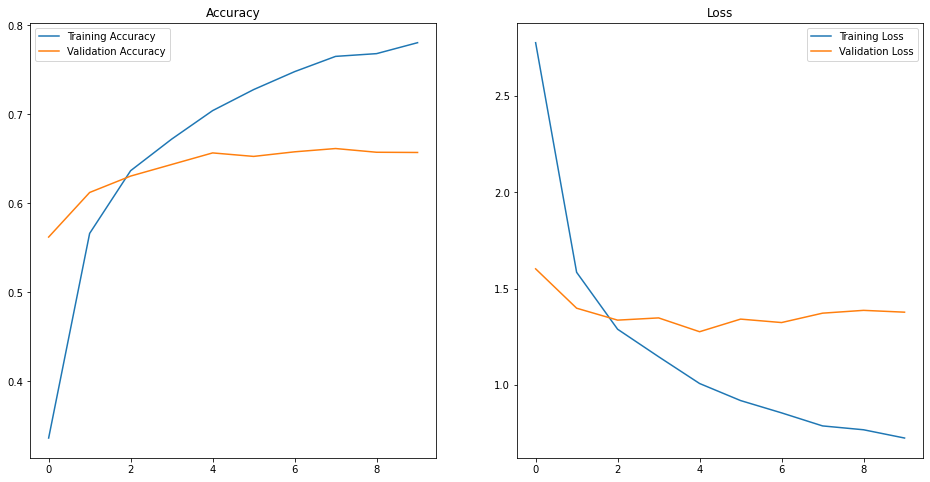

In [66]:
train_acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']

train_loss = base_model.history['loss']
val_loss = base_model.history['val_loss']

range_epochs = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, train_acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, train_loss, label='Training Loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [89]:
#get tflite file
model_dir = 'D:\Downloads'
tf.saved_model.save(model, model_dir)

tfConverter = tf.lite.TFLiteConverter.from_saved_model(model_dir)
tflite_model = tfConverter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: D:\Downloads\assets


INFO:tensorflow:Assets written to: D:\Downloads\assets


In [50]:
#get labels.txt
print (train_dataset.class_indices)

labels = '\n'.join(sorted(train_dataset.class_indices.keys()))

with open('D:\Downloads\labels.txt', 'w') as f:
    f.write(labels)

{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 'n02093647-Bedlington_terrier': 30, 'n02093754-Border_terrier': 31, 'n02093859-Kerry_blue